In [33]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.gate import IdentityGate as _I
init_printing()

In [34]:
# 量子回路図を描画するための準備
%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import *

### 4.3.2. アダマールテスト

アダマールテストの例として、制御ユニタリの $ U $ がアダマール演算子の場合を考えています。

制御H演算子は、`CGateS()`を用いて次のようになります。

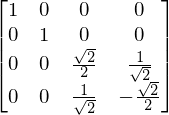

In [35]:
# 制御H演算子
cH = CGateS(1,H(0))
represent(cH,nqubits=2)

アダマールテストの演算子は、次のようになります。

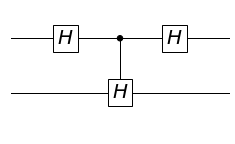

In [36]:
test_gate = H(1)*cH*H(1)
figure_test_gate = CircuitPlot(test_gate,nqubits=2)

測定前の量子状態は、次のようになります。

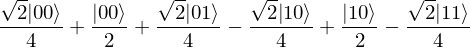

In [37]:
initial_state = Qubit('00')
tested_state = qapply(test_gate*initial_state)
tested_state

`measure_partial`関数を使うと、測定後の状態と測定の確率がリストで得られます。１つめの量子ビットが0の場合の量子状態になる確率は、`measure_partial` 関数の要素 [0][1] で得られます。ここで、SymPy では量子ビットの順番を示すインデックスが逆転していることに注意しましょう。つまり、`measure_partial` 関数の第２引数は、`(0,)` ではなく、`(1,)`です。

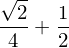

In [53]:
measured_state0 = measure_partial(tested_state,(1,))[0]
simplify(measured_state0[1])

となります。これが $ p_0 = \frac{1+ {\rm Re} \langle \psi | U | \psi \rangle }{2} $ に一致することをアダマールテストは示しています。


つまり、$ p_0 = \frac{\sqrt{2}}{4} + \frac{1}{2}$ ですから、 $ p_0 = \frac{1+ {\rm Re} \langle \psi | U | \psi \rangle }{2} = \frac{\sqrt{2}}{4} + \frac{1}{2} $ から、$ {\rm Re} \langle \psi | U | \psi \rangle  = \frac{\sqrt{2}}{2} $ が得られたことになります。

ここで、$\langle 0 | H | 0 \rangle $ を計算すると、次のように結果が一致します。

In [54]:
qapply(QubitBra('0')*H(0)*Qubit('0'))

なお、このときの量子状態は、要素 [0][0] で得られます。

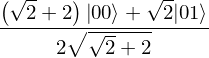

In [55]:
simplify(measured_state0[0])